<a href="https://colab.research.google.com/github/Shantanuh10/Airbnb_EDA_Project-/blob/main/Team_Notebook_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Airbnb EDA Project by Anil Kumar and Tushant Pathade**

## **Breakdown of this Notebook:**

1.**Importing Libraries**

2.**Loading the dataset**

3.**Data Cleaning:**

*   Dropping duplicates.
*   Cleaning individual columns.
*   Remove the Null values from the dataset
*   Some Transformations

4.**Data Analysis and Visualization:** Using plots to find relations between the features

* What is the average preferred price by customers according to the location?

* Number of active hosts per location (Where most of the hosts focused to own  property?)

* Where the customer pays the highest and lowest rent according to location?

* Most popular/demanded host of Airbnb in New York

* Find the total count of each room type

* Room types and their relation with availability in different neighbourhood groups

* Which are the top 25 most used words in listing names?

* Find top 10 hosts with most listings

* Find the top three hosts based on their turnover

* Find total no. of nights spend per location

* Total no. of nights spends per room types

* Top 10 highest listing neighborhood




https://github.com/anilkumar324/Airbnb-Booking-Analysis-EDA-.git

# By Anil Kumar

#Answering following Questions:

---
*   What is the average preferred price by customers according to the location?

*  No. of active host per location (Where most of the host focused to own property)

*   What is the highest price and lowest price of rent for customer according to location **OR** which host takes highest rent and lowest rent according to location
*   Most famous/demanded host of Airbnb in New york

In [ ]:
#import all library that will be used in entire project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns

In [ ]:
#Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#File path of Airbnb dataset in google drive
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA Project part-1/"
df = pd.read_csv(file_path + "Airbnb NYC 2019.csv")

In [ ]:
#Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Remove latitude, longitude, last_review and reviews_per_month columns from original dataset
df.drop(df.columns[[6,7,12,13]], axis=1, inplace=True)

In [ ]:
#we apply dropna() function to entire dataset and drop null values with dropna() function
airbnb_df = df.dropna()

In [ ]:
#Information about our new non null dataframe
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
#Brief information about numerical column in our dataset
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
#Sum of null values in dataset
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#1.What is the average preferred price by customers according to the location?

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
#Average_price of property according to the location
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


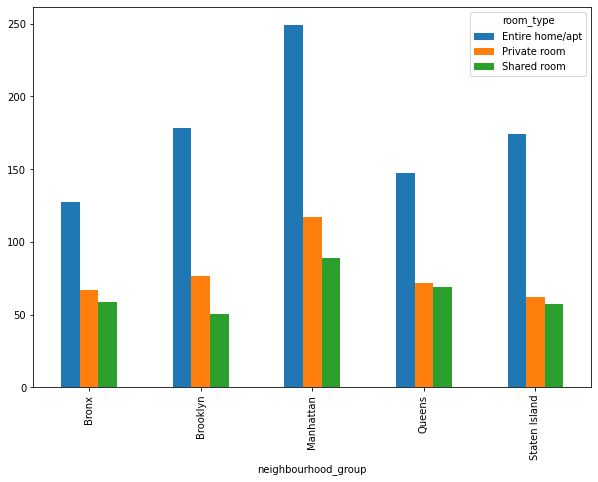

In [ ]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

#2. No. of active host per location (Where most of the host focused to own property)

In [ ]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


#Answer: Manhattan is most focused place for host to do their business


In [ ]:
#Take a simple format of above question without index for plot the line chart
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location

neighbourhood_group
Bronx             1089
Brooklyn         20089
Manhattan        21643
Queens            5664
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 0, 'Location')

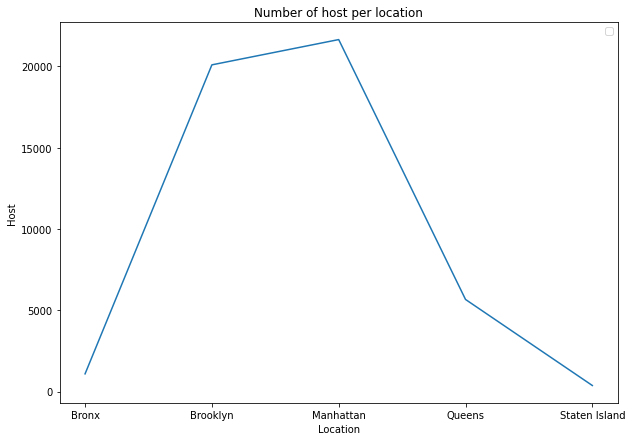

In [ ]:
#Graph
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

In [ ]:
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


#Points to be noted:

1. Here we can see that there is minimum price 0$.We have to fix it anyway because Airbnb is not provide free stay in any hotel.  
Solution: For that we check where the price is 0. We create one funtion in which as per minimum nights the price will be set as per formula [Refer below cells for more detail]

2. There are some entries in dataset in which minimum nights = 1 but it's respective price is 0
 Solution: We replace the price value with the mean value of price which amount is less than 100$. [Refer below cells for more detail]








In [ ]:
#identify the observations where minimum nights is 1 and price is minimum
airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,Shared room,10,1,0,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,Entire home/apt,10,1,43,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,Entire home/apt,6800,1,0,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,Entire home/apt,7500,1,0,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,Private room,7500,1,8,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,Entire home/apt,7703,1,0,12,146


In [ ]:
#Get the number of values which price is less than 100$
airbnb_df.loc[airbnb_df['price'] < 100,'price'].count()

21861

In [ ]:
#Make a copy of original dataframe to perform additional operation for get the desire result
airbnb_price_df = airbnb_df.copy()

In [ ]:
#Find the mean value of price which value is less than 100$
round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())

65

In [ ]:
#Change the value of price where minimum night = 1 and price of their property is less than 50$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] <= 50) & (airbnb_price_df['minimum_nights'] == 1) ,round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()) , airbnb_price_df['price']
   )

In [ ]:
#still 8 rows have amount = 0$
airbnb_price_df[airbnb_price_df['price']==0].count()

id                                8
name                              8
host_id                           8
host_name                         8
neighbourhood_group               8
neighbourhood                     8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
calculated_host_listings_count    8
availability_365                  8
dtype: int64

In [ ]:
#Find the observations where price is 0$
airbnb_price_df[airbnb_price_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,5,6,139


In [ ]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price = round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

In [ ]:
#Replace the value of price according to minimum night where price = 0$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] == 0) ,price_calculator(airbnb_price_df['minimum_nights']) , airbnb_price_df['price'])

In [ ]:
#Our new description of dataset
airbnb_price_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,153.846801,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.078850,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


#3.Where the customer pays the highest and lowest rent according  to location

In [ ]:
#Get the highest rent according to location
max_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df

,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [ ]:
#Get the lowest rent according to location
min_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
0,Bronx,20
4,Staten Island,20


In [ ]:
#Get the combine dataframe of minimum and maximum price according to location
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,10
1,Manhattan,10000,10
2,Queens,10000,10
3,Staten Island,5000,20
4,Bronx,2500,20


In [ ]:
#Create a copy of merge price dataframe
merge_price_df_copy = merge_price_df.copy()

In [ ]:
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  '''This function takes a price value as a input and give it's log values'''
  new_max_price = np.log2(values)

  return new_max_price

In [ ]:
#Apply above function on merge price dataframe
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)

In [ ]:
#Output of maximum price and minimum price after log transformation
merge_price_df_copy

,Location,Maximum price,Minimum price
0,Brooklyn,13.287712,3.321928
1,Manhattan,13.287712,3.321928
2,Queens,13.287712,3.321928
3,Staten Island,12.287712,4.321928
4,Bronx,11.287712,4.321928


Text(0.5, 1.0, 'Maximum and minimum price according to location')

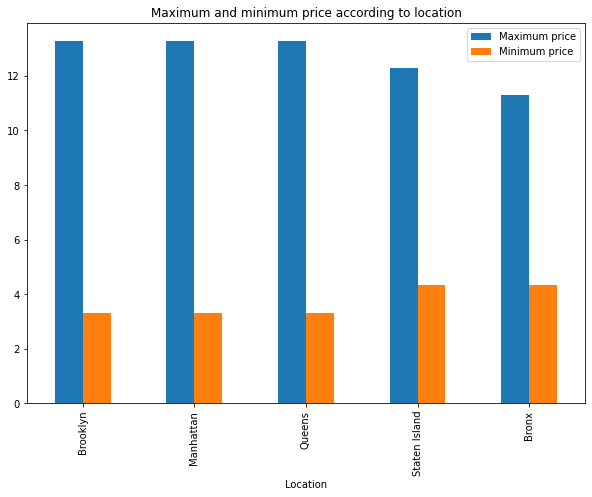

In [ ]:
#Bar graph for display maximum price and minimum price according to location
merge_price_df_copy.plot(x="Location", y=['Maximum price','Minimum price'], kind="bar")
plt.legend(labels = ['Maximum price','Minimum price'])
plt.title('Maximum and minimum price according to location')

#4.Most Popular/demanded host of Airbnb in New york


In [ ]:
#Get the host based on number of reviews
host_based_on_review_df = airbnb_price_df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_based_on_review_df

,host_id,host_name,number_of_reviews
21294,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18619,26432133,Danielle,2017
20863,35524316,Yasu & Akiko,1971
21911,40176101,Brady,1818
...,...,...,...
21799,39706334,Erin,0
21802,39724060,Jaime,0
21806,39731713,Polina,0
21812,39765154,Dave,0


In [ ]:
#Get the host based on availability in a year
host_based_on_availability_df = airbnb_price_df.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = True)
host_based_on_availability_df

,host_id,host_name,availability_365
0,2438,Tasos,0.0
22244,41764756,Luz,0.0
22243,41762539,Maria,0.0
22242,41760536,Austin,0.0
22241,41757762,Sara,0.0
...,...,...,...
1787,746552,Tom,365.0
27208,76862848,Alexis,365.0
22042,40733012,Victor,365.0
1829,772862,Jesse,365.0


In [ ]:
#Merge two dataframe based on number of reviews and availability in a year
popular_host_df = pd.merge(host_based_on_review_df,host_based_on_availability_df,on = ['host_id','host_name']).sort_values(['availability_365','number_of_reviews'],ascending = [True,False]).rename(columns = {'number_of_reviews':'Number of reviews','availability_365':'Availability in a year'})

popular_host_df

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0
...,...,...,...,...
37133,37360127,Mel,0,365.0
37137,37424221,Trevor,0,365.0
37225,35741633,Chen,0,365.0
37248,40834217,Jay,0,365.0


In [ ]:
#Most popular top 5 host in new york
popular_host_df.head(5)

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0


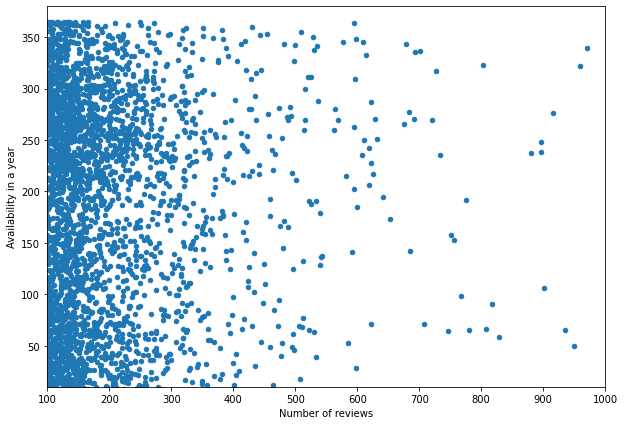

In [ ]:
#Create scatter plot based on number of reviews and availability in a year
popular_host_df.plot.scatter(x='Number of reviews', y='Availability in a year', xlim=(100,1000),ylim=(10,380));